# Parsing PDFs Homework

With the power of pdfminer, pytesseract, Camelot, and Tika, let's analyze some documents!

> If at any point you think, **"I'm close enough, I'd just edit the rest of it in Excel"**: that's fine! Just make a note of it.

## A trick to use again and again

### Approach 1

Before we get started: when you want to take the first row of your data and set it as the header, use this trick.

In [21]:
import pandas as pd
import camelot
import numpy as np
import tika
from tika import parser
import re

In [3]:
df = pd.DataFrame([
    [ 'fruit name', 'likes' ],
    [ 'apple', 15 ],
    [ 'carrot', 3 ],
    [ 'sweet potato', 45 ],
    [ 'peach', 12 ],
])
df

,0,1
0,fruit name,likes
1,apple,15
2,carrot,3
3,sweet potato,45
4,peach,12


In [4]:
# Set the first column as the columns
df.columns = df.loc[0]

# Drop the first row
df = df.drop(0)

df

,fruit name,likes
1,apple,15
2,carrot,3
3,sweet potato,45
4,peach,12


🚀 Done!

### Approach 2

Another alternative is to use `.rename` on your columns and just filter out the columns you aren't interested in. This can be useful if the column name shows up multiple times in your data for some reason or another.

In [5]:
# Starting with the same-ish data...
df = pd.DataFrame([
    [ 'fruit name', 'likes' ],
    [ 'apple', 15 ],
    [ 'carrot', 3 ],
    [ 'fruit name', 'likes' ],
    [ 'sweet potato', 45 ],
    [ 'peach', 12 ],
])
df

,0,1
0,fruit name,likes
1,apple,15
2,carrot,3
3,fruit name,likes
4,sweet potato,45
5,peach,12


In [6]:
df = df.rename(columns={
    0: 'fruit name',
    1: 'likes'
})
df = df[df['fruit name'] != 'fruit name']
df

,fruit name,likes
1,apple,15
2,carrot,3
4,sweet potato,45
5,peach,12


🚀 Done!

### Useful tips about coordinates

If you want to grab only a section of the page [Kull](https://jsoma.github.io/kull/#/) might be helpful in finding the coordinates.

> **Alternatively** run `%matplotlib notebook` in a cell. Afterwards, every time you use something like `camelot.plot(tables[0]).show()` it will get you nice zoomable, hoverable versions that include `x` and `y` coordinates as you move your mouse.

Coordinates are given as `"left_x,top_y,right_x,bottom_y"` with `(0,0)` being in the bottom left-hand corner.

Note that all coordinates are strings, for some reason. It won't be `[1, 2, 3, 4]` it will be `['1,2,3,4']`

# The homework

This is **mostly Camelot work**, because I don't really have any good image-based PDFs to stretch your wings on tesseract. If you know of any, let me know and I can put together another couple exercises.

## Prison Inmates

Working from [InmateList.pdf](InmateList.pdf), save a CSV file that includes every inmate.

* Make sure your rows are *all data*, and you don't have any people named "Inmate Name."


In [3]:
## If camelot isn't working, check if it can find the Ghostscript library. 
## If this command gives you nothing, look up where Ghostscript is found in your program files and  add the path to your environmental variables.
#import ctypes
#from ctypes.util import find_library
#find_library("".join(("gsdll", str(ctypes.sizeof(ctypes.c_voidp) * 8), ".dll")))

'C:\\Program Files\\gs\\gs9.54.0\\bin\\gsdll64.dll'

In [2]:
tables = camelot.read_pdf("InmateList.pdf", flavor="stream", pages='1-end')

# lattice - borders between things
# stream - empty space between things

In [3]:
tables

<TableList n=16>

<IPython.core.display.Javascript object>


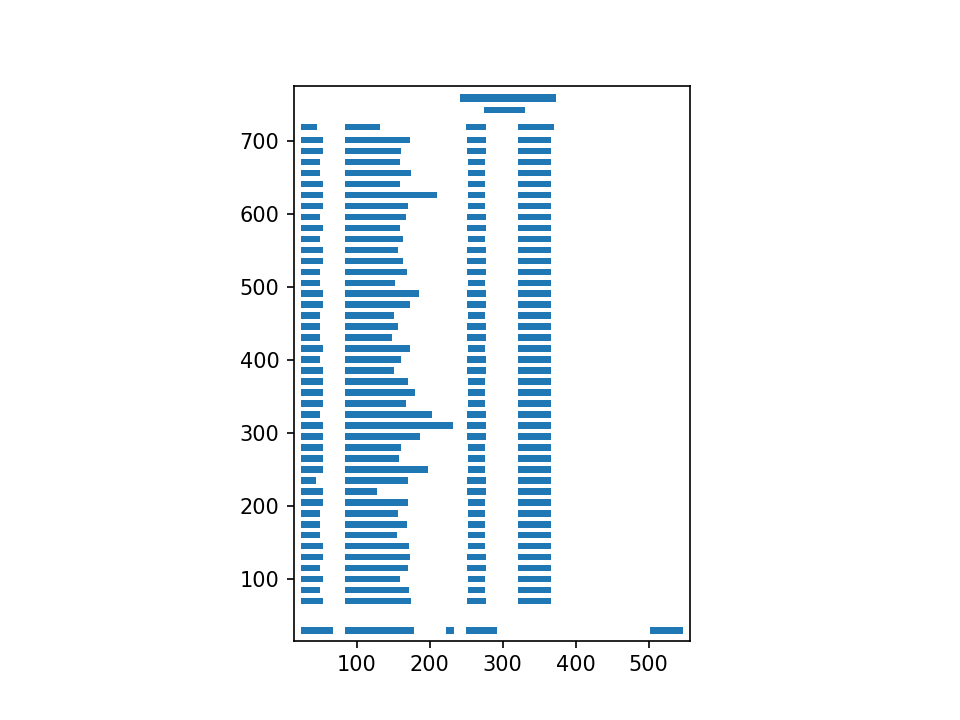

In [9]:
%matplotlib notebook
camelot.plot(tables[6], kind='text').show()

In [109]:
tables[0].df.drop([0,1,2]).drop(columns=[2,5]) #Works for every page except 7 and 16

,0,1,3,4
3,70693,"ABDALLAH, MICHAEL",ECHC,04/30/2021
4,152645,"ABDI, ABDI",ECCF,06/20/2021
5,144666,"ABDULLAH, DHAFIR",ECCF,06/17/2021
6,156374,"ACEVEDO, CARLOS",ECHC,06/06/2021
7,57243,"ACKER, RAYMOND P",ECCF,11/02/2020
8,68579,"ADAMS, JERMAIN C",ECHC,09/19/2019
9,45262,"ADAMS, MARQUIS",ECHC,05/27/2021
10,75738,"AKRIGHT, JOSEPH A",ECCF,05/29/2021
11,104048,"ALBERTSON, ANDREW",ECCF,12/04/2019
12,1577,"ALEXANDER, BRIAN",ECHC,07/13/2021


In [204]:
pg1 = tables[15].df.drop([0,1,2])
pg1 = pg1[pg1[0].str.contains("Created On")==False]
pg1 = pg1.replace('', np.nan)  
pg1 = pg1.dropna(axis=1, how="all")
pg1

,0,1,2,3
3,27065,"WHITFIELD, JAMES",ECHC,07/05/2021
4,145872,"WHITFIELD, KYA S",ECHC,06/21/2021
5,150613,"WHITTAKER, DAQUAN J",ECCF,05/06/2021
6,149101,"WHITTAKER, TANJA M",ECHC,12/01/2020
7,1007,"WILEY, KURT R",ECCF,09/17/2020
8,147398,"WILKINS, ODELL M",ECHC,11/25/2020
9,98502,"WILLIAMS, ADAM W",ECHC,02/25/2021
10,132212,"WILLIAMS, BRANDON",ECHC,09/16/2020
11,105145,"WILLIAMS, DAVID A",ECHC,07/03/2021
12,97828,"WILLIAMS, DEREK A",ECCF,02/22/2021


In [201]:
dfs = pd.DataFrame()

for table in tables:
    data = table.df.drop([0,1,2])
    data = data.replace('', np.nan)  
    data = data[data[0].str.contains("Created On")==False]
    data = data.dropna(axis=1, how="any")
    dfs = dfs.append(data, ignore_index = True)
    
dfs
##Columns are messed up because of pages 7 and 15.

,0,1,2,3,4
0,70693,"ABDALLAH, MICHAEL",NaN,ECHC,04/30/2021
1,152645,"ABDI, ABDI",NaN,ECCF,06/20/2021
2,144666,"ABDULLAH, DHAFIR",NaN,ECCF,06/17/2021
3,156374,"ACEVEDO, CARLOS",NaN,ECHC,06/06/2021
4,57243,"ACKER, RAYMOND P",NaN,ECCF,11/02/2020
...,...,...,...,...,...
679,18303,"ZANGHI, SANTINO J",ECHC,05/24/2021,NaN
680,155109,"ZARCONE, THOMAS E",ECHC,06/27/2021,NaN
681,63815,"ZIELINSKI, LARRY",ECHC,07/06/2021,NaN
682,20740,"ZIELINSKI, LAWRENCE T",ECCF,11/04/2020,NaN


In [205]:
dfs[2].fillna(dfs[3], inplace=True)

In [207]:
dfs[4].fillna(dfs[3], inplace=True)

In [211]:
dfs = dfs.drop(columns=[3])
         
dfs

,0,1,2,4
0,70693,"ABDALLAH, MICHAEL",ECHC,04/30/2021
1,152645,"ABDI, ABDI",ECCF,06/20/2021
2,144666,"ABDULLAH, DHAFIR",ECCF,06/17/2021
3,156374,"ACEVEDO, CARLOS",ECHC,06/06/2021
4,57243,"ACKER, RAYMOND P",ECCF,11/02/2020
...,...,...,...,...
679,18303,"ZANGHI, SANTINO J",ECHC,05/24/2021
680,155109,"ZARCONE, THOMAS E",ECHC,06/27/2021
681,63815,"ZIELINSKI, LARRY",ECHC,07/06/2021
682,20740,"ZIELINSKI, LAWRENCE T",ECCF,11/04/2020


In [214]:
dfs = dfs.rename(columns={0:"icn", 1:"inmate_name", 2:"facility", 4: "booking_date"})

In [215]:
dfs.to_csv("inmates.csv", index=False)

## WHO resolutions

Using [A74_R13-en.pdf](A74_R13-en.pdf), what ten member countries are given the highest assessments?

* You might need to have two separate queries, and combine the results: that last page is pretty awful!
* Always rename your columns
* Double-check that your sorting looks right......
* You can still get the answer even without perfectly clean data

In [218]:
tables = camelot.read_pdf("A74_R13-en.pdf", flavor="stream", pages='1-end')

In [219]:
tables

<TableList n=6>

In [265]:
dfs = pd.DataFrame()

for table in tables:
    data = table.df
    data = data.replace('', np.nan)  
    data = data.dropna(axis=1, how="all")
    dfs = dfs.append(data, ignore_index = True)

In [266]:
dfs

,0,1,2,3,4
0,Members and,WHO scale,NaN,NaN,NaN
1,Associate Members,for 2022–2023,NaN,NaN,NaN
2,NaN,%,NaN,NaN,NaN
3,Afghanistan,0.0070,NaN,NaN,NaN
4,Albania,0.0080,NaN,NaN,NaN
...,...,...,...,...,...
220,NaN,Zimbabwe,NaN,0.0050,NaN
221,NaN,TOTAL,NaN,100.000,NaN
222,NaN,NaN,NaN,NaN,"Seventh plenary meeting, 31 May 2021"
223,NaN,NaN,NaN,NaN,A74/VR/7


In [267]:
dfs = dfs.drop(columns=[2,4])

In [268]:
dfs[0].fillna(dfs[1], inplace=True)
dfs[3].fillna(dfs[1], inplace=True)


In [269]:
dfs = dfs.drop(columns=[1])

In [248]:
#dfs.dropna(axis='rows', how='any')

,0,3
0,Members and,WHO scale
1,Associate Members,for 2022–2023
2,%,%
3,Afghanistan,0.0070
4,Albania,0.0080
...,...,...
216,Members and,WHO scale
217,Associate Members,for 2022–2023
219,Zambia,0.0090
220,Zimbabwe,0.0050


In [270]:
dfs = dfs[dfs[0].str.contains("Members and")==False]
dfs = dfs[dfs[0].str.contains("Associate Members")==False]
dfs = dfs[dfs[0].str.contains("%")==False]

dfs

#Still some NAs because some country names are on multiple lines (e.g. Great Britain)

,0,3
3,Afghanistan,0.0070
4,Albania,0.0080
5,Algeria,0.1380
6,Andorra,0.0050
7,Angola,0.0100
...,...,...
215,WHA74.13,NaN
219,Zambia,0.0090
220,Zimbabwe,0.0050
221,TOTAL,100.000


In [273]:
dfs.to_csv("who_assessments.csv", index=False)

In [275]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 3 to 224
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      205 non-null    object
 1   assessments  197 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [277]:
dfs['assessments'] = dfs['assessments'].astype(float)

In [284]:
#These country names were broken up into several lines -- only case where this matters is Great Britain
dfs[dfs['assessments'].isna() == True]

,country,assessments
45,Cook Islands (not a member of the,NaN
53,Democratic People’s Republic of,NaN
140,Niue (not a member of the United,NaN
154,Puerto Rico (not a member of the,NaN
194,Tokelau (not a member of the United,NaN
205,United Kingdom of Great Britain and,NaN
215,WHA74.13,NaN
224,6,NaN


In [281]:
dfs.sort_values(by="assessments", ascending = False).head(11)

#NOTE: Northern Ireland is actually "United Kingdom of Great Britain and Northern Ireland"

,country,assessments
221,TOTAL,100.0000
208,United States of America,22.0000
41,China,12.0058
97,Japan,8.5645
77,Germany,6.0904
206,Northern Ireland,4.5673
70,France,4.4273
95,Italy,3.3072
29,Brazil,2.9482
37,Canada,2.7342


## The Avengers

Using [THE_AVENGERS.pdf](THE_AVENGERS.pdf), approximately how many lines does Captain America have as compared to Thor and Iron Man?

* Character names only: we're only counting `IRON MAN` as Iron Man, not `TONY`.
* Your new best friend might be `\n`
* Look up `.count` for strings

In [16]:
parsed = parser.from_file("THE_AVENGERS.pdf")

2021-07-24 20:04:52,432 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to C:\Users\savey\AppData\Local\Temp\tika-server.jar.
2021-07-24 20:07:35,529 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to C:\Users\savey\AppData\Local\Temp\tika-server.jar.md5.
2021-07-24 20:07:37,155 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [17]:
parsed.keys()

dict_keys(['metadata', 'content', 'status'])

In [19]:
parsed['content'][:2000]

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMarvel’s THE AVENGERS\n\nWritten By\n\nJoss Whedon\n\nStory By\n\nZak Penn and Joss Whedon\n\nBased on the characters appearing in the comic books\n\nPublished by MARVEL Comics\n\nTranscribed to PDF using:\n\nCeltx Studio | 2012\n\nComposed In Celtx Studio\n\nWith the help of\n\nSiOmniaFicta’s Script\n\non fanfiction.net\n\nENTERTAINMENT PURPOSES ONLY\n\n\n\n1 EXT. UNKNOWN AREA OF SPACE 1\n\nSpace, a floating staircase among the rocks...THE OTHER\n\nspeaks to a DISEMBODIED FIGURE in a chair.\n\nTHE OTHER (V.O)\n\nThe Tesseract has awakened. It is\n\non a little world, a human world.\n\nThey would wield its power.\n\nTHE OTHER hands LOKI a scepter with a glowing blue gem...\n\nTHE OTHER (V.O)\n\nBut our ally knows its workings as\n\nthey never will. He is ready to\n\nlead. And our force...\n\nThe CHITAURI put on their face mask and get ready.\n\nTHE OTHER (V.O)\n\n...our Chitauri, will follow. The

In [52]:
pattern1 = "\n\nIRON MAN\n\n"
pattern2 = "\n\nIRON MAN \(CONT"
pattern3 = "\n\nIRON MAN \(V.O"

result = re.findall(pattern1, parsed['content'])
result2 = re.findall(pattern2, parsed['content'])
result3 = re.findall(pattern3, parsed['content'])

print(len(result))
print(len(result2))
print(len(result3))
total = len(result) + len(result2) + len(result3)
print("Iron man speaks", total, "times")

19
0
0
Iron man speaks 19 times


In [54]:
pattern1 = "\n\nCAPTAIN AMERICA\n\n"
pattern2 = "\n\nCAPTAIN AMERICA \(CONT"
pattern3 = "\n\nCAPTAIN AMERICA \(V.O"

result = re.findall(pattern1, parsed['content'])
result2 = re.findall(pattern2, parsed['content'])
result3 = re.findall(pattern3, parsed['content'])

print(len(result))
print(len(result2))
print(len(result3))
total = len(result) + len(result2) + len(result3)
print("Captain America speaks", total, "times")

35
2
1
Captain America speaks 38 times


In [55]:
pattern1 = "\n\nTHOR\n\n"
pattern2 = "\n\nTHOR \(CONT"
pattern3 = "\n\nTHOR \(V.O"

result = re.findall(pattern1, parsed['content'])
result2 = re.findall(pattern2, parsed['content'])
result3 = re.findall(pattern3, parsed['content'])

print(len(result))
print(len(result2))
print(len(result3))
total = len(result) + len(result2) + len(result3)
print("Thor speaks", total, "times")

47
0
0
Thor speaks 47 times


## COVID data

Using [covidweekly2721.pdf](covidweekly2721.pdf), what's the total number of tests performed in Minnesota? Use the Laboratory Test Rates by County of Residence chart.

* You COULD pull both tables separately OR you could pull them both at once and split them in pandas.
* Remember you can do things like `df[['name','age']]` to ask for multiple columns

In [56]:
tables = camelot.read_pdf("covidweekly2721.pdf", flavor="stream", pages='6')

<IPython.core.display.Javascript object>


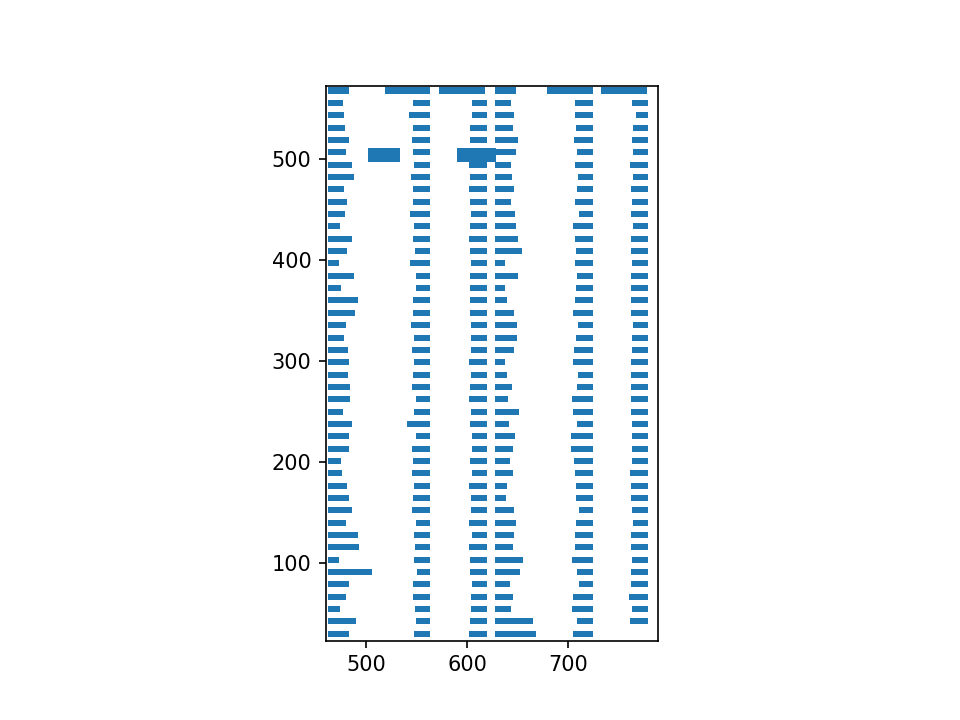

In [66]:
%matplotlib notebook
camelot.plot(tables[0], kind='text').show()

In [61]:
data = tables[0].df
data

,0,1,2,3,4,5,6
0,,,,,,"18,544",
1,,Laboratory Test Rates by County of Residence,,,,,
2,,,,,,"tests per 10,000 people statewide",
3,,County,Number of Tests,Cumulative Rate,County,Number of Tests,Cumulative Rate
4,Cumulative rate of tests by county of residenc...,,,,,,
5,,Aitkin,"19,204","12,128",Martin,"39,876","19,974"
6,reporting both positive and negative results a...,,,,,,
7,,,,,,,
8,,Anoka,"545,958","15,714",McLeod,"61,300","17,111"
9,,Becker,"59,238","17,540",Meeker,"37,736","16,351"


In [67]:
tables = camelot.read_pdf("covidweekly2721.pdf", flavor="stream", pages='6', table_areas=['462, 571, 786, 23'])

In [69]:
data = tables[0].df
data

,0,1,2,3,4,5
0,County,Number of Tests,Cumulative Rate,County,Number of Tests,Cumulative Rate
1,Aitkin,"19,204","12,128",Martin,"39,876","19,974"
2,Anoka,"545,958","15,714",McLeod,"61,300","17,111"
3,Becker,"59,238","17,540",Meeker,"37,736","16,351"
4,Beltrami,"60,345","13,085",Mille Lacs,"44,688","17,369"
5,Benton,"77,865",,Morrison,"59,179","17,961"
6,,"9,953","26,976",,,
7,Big Stone,"13,220","26,356",Mower,"79,446","20,061"
8,Blue Earth,"136,895","20,641",Murray,"15,175","18,167"
9,Brown,"55,709","22,097",Nicollet,"66,163","19,585"


In [78]:
#https://www.geeksforgeeks.org/split-pandas-dataframe-by-column-index/

pg1 = data.iloc[:,[0,1,2]]
pg1.columns = pg1.loc[0]
pg1 = pg1.drop(0)

pg1 = pg1.drop(6) #dropping ghost row after Benton
pg1

,County,Number of Tests,Cumulative Rate
1,Aitkin,"19,204","12,128"
2,Anoka,"545,958","15,714"
3,Becker,"59,238","17,540"
4,Beltrami,"60,345","13,085"
5,Benton,"77,865",
7,Big Stone,"13,220","26,356"
8,Blue Earth,"136,895","20,641"
9,Brown,"55,709","22,097"
10,Carlton,"79,882","22,477"
11,Carver,"154,305","15,367"


In [79]:
pg2 = data.iloc[:,[3,4,5]]
pg2.columns = pg2.loc[0]
pg2 = pg2.drop(0)
pg2 = pg2.drop(6)

pg2

,County,Number of Tests,Cumulative Rate
1,Martin,"39,876","19,974"
2,McLeod,"61,300","17,111"
3,Meeker,"37,736","16,351"
4,Mille Lacs,"44,688","17,369"
5,Morrison,"59,179","17,961"
7,Mower,"79,446","20,061"
8,Murray,"15,175","18,167"
9,Nicollet,"66,163","19,585"
10,Nobles,"30,979","14,185"
11,Norman,"11,471","17,489"


In [80]:
mn_tests = pd.concat([pg1,pg2], ignore_index=True)
mn_tests

,County,Number of Tests,Cumulative Rate
0,Aitkin,"19,204","12,128"
1,Anoka,"545,958","15,714"
2,Becker,"59,238","17,540"
3,Beltrami,"60,345","13,085"
4,Benton,"77,865",
...,...,...,...
83,Wilkin,"7,973","12,570"
84,Winona,"106,625","20,970"
85,Wright,"194,085","14,621"
86,Yellow Medicine,"19,972","20,239"


In [81]:
mn_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   County           88 non-null     object
 1   Number of Tests  88 non-null     object
 2   Cumulative Rate  88 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


In [86]:
#mn_tests['Number of Tests'] = mn_tests['Number of Tests'].astype(float)

mn_tests['Number of Tests'] = mn_tests['Number of Tests'].str.replace(',', '').astype(float)

In [89]:
mn_tests['Number of Tests'].sum()

10249823.0

## Theme Parks

Using [2019-Theme-Index-web-1.pdf](2019-Theme-Index-web-1.pdf), save a CSV of the top 10 theme park groups worldwide.

* You can clean the results or you can restrict the area the table is pulled from, up to you

In [90]:
tables = camelot.read_pdf("2019-Theme-Index-web-1.pdf", flavor="stream", pages="11")

tables

<TableList n=1>

In [92]:
theme_parks = tables[0].df

theme_parks

,0,1,2,3,4
0,RANK\n1,GROUP NAME\nWALT DISNEY ATTRACTIONS,% CHANGE\n-0.8%,"ATTENDANCE\n2019\n 155,991,000","ATTENDANCE \n2018\n 157,311,000"
1,2,MERLIN ENTERTAINMENTS GROUP,0.9%,"67,000,000","66,400,000*"
2,3,OCT PARKS CHINA,9.4%,"53,970,000","49,350,000"
3,4,UNIVERSAL PARKS AND RESORTS,2.3%,"51,243,000","50,068,000"
4,5,FANTAWILD GROUP,19.8%,"50,393,000","42,074,000"
5,6,CHIMELONG GROUP,8.9%,"37,018,000","34,007,000"
6,7,SIX FLAGS INC.,2.5%,"32,811,000","32,024,000"
7,8,CEDAR FAIR ENTERTAINMENT COMPANY,7.8%,"27,938,000","25,912,000"
8,9,SEAWORLD PARKS & ENTERTAINMENT,0.2%,"22,624,000","22,582,000"
9,10,PARQUES REUNIDOS,6.2%,"22,195,000","20,900,000"


In [ ]:
theme_parks.to_csv("themeparks.csv", index=False)

#This is a short list so it's easier to clean it in Excel than in Pandas 

## Hunting licenses

Using [US_Fish_and_Wildlife_Service_2021.pdf](US_Fish_and_Wildlife_Service_2021.pdf) and [a CSV of state populations](http://goodcsv.com/geography/us-states-territories/), find the states with the highest per-capita hunting license holders.

In [115]:
#tables = camelot.read_pdf("covidweekly2721.pdf", flavor="stream", pages='6', table_areas=['462, 571, 786, 23'])

tables = camelot.read_pdf("US_Fish_and_Wildlife_Service_2021.pdf", flavor="lattice")
tables

<TableList n=1>

In [116]:
data = tables[0].df
data

,0,1,2,3,4,5,6,7
0,State,Paid Hunting License \nHolders*,"Resident Hunting Licenses,\nTags, Permits and ...","Non-Resident Hunting \nLicenses,\nTags, Permit...","Total Hunting License, \nTags,Permits & Stamps**","Cost - Resident Hunting \nLicenses,\nTags, Per...","Cost - Non-Resident Hunting \nLicenses,\nTags,...",Gross Cost - Hunting \nLicenses
1,AK,"93,559","423,501","59,235","482,736","$4,859,356","$9,046,715","$13,906,071"
2,AL,"452,400","601,683","45,397","647,080","$9,700,295","$6,715,734","$16,416,029"
3,AR,"343,300","349,098","150,728","499,826","$7,851,601","$11,271,653","$19,123,254"
4,AS,0,0,0,0,$0,$0,$0
5,AZ,"302,383","464,607","88,708","553,315","$13,931,397","$5,968,169","$19,899,566"
6,CA,"262,009","949,540","25,535","975,075","$20,270,941","$1,114,625","$21,385,566"
7,CO,"296,609","481,253","120,954","602,207","$13,270,492","$49,732,815","$63,003,307"
8,CT,"32,052","101,377","4,543","105,920","$1,855,046","$372,108","$2,227,154"
9,DC,0,0,0,0,$0,$0,$0


In [117]:
#data.replace({ r'\A\s+|\s+\Z': '', '\n' : ' '}, regex=True, inplace=True)
#https://stackoverflow.com/questions/46522652/replacing-newlines-with-spaces-for-str-columns-through-pandas-dataframe

data.replace('\n', ' ', regex=True, inplace=True)

In [118]:
data

,0,1,2,3,4,5,6,7
0,State,Paid Hunting License Holders*,"Resident Hunting Licenses, Tags, Permits and S...","Non-Resident Hunting Licenses, Tags, Permits ...","Total Hunting License, Tags,Permits & Stamps**","Cost - Resident Hunting Licenses, Tags, Permi...","Cost - Non-Resident Hunting Licenses, Tags, P...",Gross Cost - Hunting Licenses
1,AK,"93,559","423,501","59,235","482,736","$4,859,356","$9,046,715","$13,906,071"
2,AL,"452,400","601,683","45,397","647,080","$9,700,295","$6,715,734","$16,416,029"
3,AR,"343,300","349,098","150,728","499,826","$7,851,601","$11,271,653","$19,123,254"
4,AS,0,0,0,0,$0,$0,$0
5,AZ,"302,383","464,607","88,708","553,315","$13,931,397","$5,968,169","$19,899,566"
6,CA,"262,009","949,540","25,535","975,075","$20,270,941","$1,114,625","$21,385,566"
7,CO,"296,609","481,253","120,954","602,207","$13,270,492","$49,732,815","$63,003,307"
8,CT,"32,052","101,377","4,543","105,920","$1,855,046","$372,108","$2,227,154"
9,DC,0,0,0,0,$0,$0,$0


In [119]:
data.columns = data.loc[0]
data = data.drop(0)
data

,State,Paid Hunting License Holders*,"Resident Hunting Licenses, Tags, Permits and Stamps","Non-Resident Hunting Licenses, Tags, Permits and Stamps","Total Hunting License, Tags,Permits & Stamps**","Cost - Resident Hunting Licenses, Tags, Permits and Stamps","Cost - Non-Resident Hunting Licenses, Tags, Permits and Stamps",Gross Cost - Hunting Licenses
1,AK,"93,559","423,501","59,235","482,736","$4,859,356","$9,046,715","$13,906,071"
2,AL,"452,400","601,683","45,397","647,080","$9,700,295","$6,715,734","$16,416,029"
3,AR,"343,300","349,098","150,728","499,826","$7,851,601","$11,271,653","$19,123,254"
4,AS,0,0,0,0,$0,$0,$0
5,AZ,"302,383","464,607","88,708","553,315","$13,931,397","$5,968,169","$19,899,566"
6,CA,"262,009","949,540","25,535","975,075","$20,270,941","$1,114,625","$21,385,566"
7,CO,"296,609","481,253","120,954","602,207","$13,270,492","$49,732,815","$63,003,307"
8,CT,"32,052","101,377","4,543","105,920","$1,855,046","$372,108","$2,227,154"
9,DC,0,0,0,0,$0,$0,$0
10,DE,"15,619","45,997","6,044","52,041","$899,857","$499,867","$1,399,724"


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 1 to 57
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   State                                                            57 non-null     object
 1   Paid Hunting License  Holders*                                   57 non-null     object
 2   Resident Hunting Licenses, Tags, Permits and Stamps              57 non-null     object
 3   Non-Resident Hunting  Licenses, Tags, Permits and Stamps         57 non-null     object
 4   Total Hunting License,  Tags,Permits & Stamps**                  57 non-null     object
 5   Cost - Resident Hunting  Licenses, Tags, Permits and Stamps      57 non-null     object
 6   Cost - Non-Resident Hunting  Licenses, Tags, Permits and Stamps  57 non-null     object
 7   Gross Cost - Hunting  Licenses                          

In [123]:
data['Paid Hunting License  Holders*'] = data['Paid Hunting License  Holders*'].str.replace(',', '').astype(int)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 1 to 57
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   State                                                            57 non-null     object
 1   Paid Hunting License  Holders*                                   57 non-null     int32 
 2   Resident Hunting Licenses, Tags, Permits and Stamps              57 non-null     object
 3   Non-Resident Hunting  Licenses, Tags, Permits and Stamps         57 non-null     object
 4   Total Hunting License,  Tags,Permits & Stamps**                  57 non-null     object
 5   Cost - Resident Hunting  Licenses, Tags, Permits and Stamps      57 non-null     object
 6   Cost - Non-Resident Hunting  Licenses, Tags, Permits and Stamps  57 non-null     object
 7   Gross Cost - Hunting  Licenses                          

In [134]:
states = pd.read_csv("us-states-territories.csv", thousands=r',')

In [135]:
states

,Type,Name,Abbreviation,Capital,Population (2015),Population (2019),area (square miles)
0,State,Alabama,AL,Montgomery,NaN,4903185.0,52420.000
1,State,Alaska,AK,Juneau,NaN,731545.0,665384.000
2,State,Arizona,AZ,Phoenix,NaN,7278717.0,113990.000
3,State,Arkansas,AR,Little Rock,NaN,3017804.0,53179.000
4,State,California,CA,Sacramento,NaN,39512223.0,163695.000
...,...,...,...,...,...,...,...
60,Territory,Kingman Reef,NaN,NaN,NaN,NaN,0.005
61,Territory,Midway Atoll,NaN,NaN,NaN,NaN,3.000
62,Territory,Navassa Island,NaN,NaN,NaN,NaN,3.000
63,Territory,Palmyra Atoll,NaN,NaN,NaN,NaN,1.500


In [132]:
license_holders = data[['State','Paid Hunting License  Holders*']]
license_holders

,State,Paid Hunting License Holders*
1,AK,93559
2,AL,452400
3,AR,343300
4,AS,0
5,AZ,302383
6,CA,262009
7,CO,296609
8,CT,32052
9,DC,0
10,DE,15619


In [136]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 65 non-null     object 
 1   Name                 65 non-null     object 
 2   Abbreviation         56 non-null     object 
 3   Capital              55 non-null     object 
 4   Population (2015)    4 non-null      float64
 5   Population (2019)    52 non-null     float64
 6   area (square miles)  65 non-null     float64
dtypes: float64(3), object(4)
memory usage: 3.7+ KB


In [139]:
license_holders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 1 to 57
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   State                           57 non-null     object
 1   Paid Hunting License  Holders*  57 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 1.1+ KB


In [144]:
states['Abbreviation'] = states.Abbreviation.str.strip()

In [147]:
#https://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.merge.html
merged = states.merge(license_holders, left_on='Abbreviation', right_on='State', how = 'inner')
merged

,Type,Name,Abbreviation,Capital,Population (2015),Population (2019),area (square miles),State,Paid Hunting License Holders*
0,State,Alabama,AL,Montgomery,NaN,4903185.0,52420.0,AL,452400
1,State,Alaska,AK,Juneau,NaN,731545.0,665384.0,AK,93559
2,State,Arizona,AZ,Phoenix,NaN,7278717.0,113990.0,AZ,302383
3,State,Arkansas,AR,Little Rock,NaN,3017804.0,53179.0,AR,343300
4,State,California,CA,Sacramento,NaN,39512223.0,163695.0,CA,262009
5,State,Colorado,CO,Denver,NaN,5758736.0,104094.0,CO,296609
6,State,Connecticut,CT,Hartford,NaN,3565278.0,5543.0,CT,32052
7,State,Delaware,DE,Dover,NaN,973764.0,2489.0,DE,15619
8,State,Florida,FL,Tallahassee,NaN,21477737.0,65758.0,FL,191501
9,State,Georgia,GA,Atlanta,NaN,10617423.0,59425.0,GA,724269


In [161]:
merged['per_cap'] = merged['Paid Hunting License  Holders*'] / merged['Population (2019)']

In [164]:
merged.sort_values(by="per_cap", ascending=False).head(10)

,Type,Name,Abbreviation,Capital,Population (2015),Population (2019),area (square miles),State,Paid Hunting License Holders*,per_cap
40,State,South Dakota,SD,Pierre,NaN,884659.0,77116.0,SD,213786,0.241659
49,State,Wyoming,WY,Cheyenne,NaN,578759.0,97813.0,WY,135228,0.233652
25,State,Montana,MT,Helena,NaN,1068778.0,147040.0,MT,222309,0.208003
33,State,North Dakota,ND,Bismarck,NaN,762062.0,70698.0,ND,135724,0.178101
11,State,Idaho,ID,Boise,NaN,1787065.0,83569.0,ID,275244,0.154020
18,State,Maine,ME,Augusta,NaN,1344212.0,35380.0,ME,201370,0.149805
35,State,Oklahoma,OK,Oklahoma City,NaN,3956971.0,69899.0,OK,512724,0.129575
1,State,Alaska,AK,Juneau,NaN,731545.0,665384.0,AK,93559,0.127892
47,State,West Virginia,WV,Charleston,NaN,1792147.0,24230.0,WV,205447,0.114637
48,State,Wisconsin,WI,Madison,NaN,5822434.0,65496.0,WI,666670,0.114500
